In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df_vaccines = pd.read_csv('../data/COVID_VACCINATIONS.csv')
df_deaths = pd.read_csv('../data/COVID DEATHS.csv')

In [27]:
merged_df = pd.merge(df_deaths, df_vaccines, left_index=True, right_index=True)

In [28]:
columns_to_drop = ['iso_code_y', 'continent_y', 'location_y', 'date_y',
    'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
    'total_cases_per_million', 'new_cases_per_million',
    'total_deaths_per_million', 'new_deaths_per_million',
    'icu_patients', 'hosp_patients', 'weekly_icu_admissions', 'weekly_hosp_admissions',
    'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
    'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
    'positive_rate', 'tests_per_case', 'tests_units',
    'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
    'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
    'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million',
    'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred',
    'stringency_index', 'median_age', 'handwashing_facilities',
    'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative']
main_df = merged_df.drop(columns = columns_to_drop).copy()

In [29]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302749 entries, 0 to 302748
Data columns (total 32 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   iso_code_x                               302749 non-null  object 
 1   continent_x                              288347 non-null  object 
 2   location_x                               302749 non-null  object 
 3   date_x                                   302749 non-null  object 
 4   population                               302749 non-null  int64  
 5   new_cases_smoothed                       292800 non-null  float64
 6   new_deaths_smoothed                      292909 non-null  float64
 7   new_cases_smoothed_per_million           292800 non-null  float64
 8   new_deaths_smoothed_per_million          292909 non-null  float64
 9   reproduction_rate                        184817 non-null  float64
 10  icu_patients_per_million        

In [30]:
# Isolate what countries you want to use:
countries_of_interest = ['Brazil', 'China', 'United States', 'Russia', 'India']
filtered_df = main_df[main_df['location_x'].isin(countries_of_interest)]

filtered_df['date'] = pd.to_datetime(filtered_df['date_x'])  # Convert 'date' column to datetime format
filtered_df = filtered_df.set_index('date')  # Set 'date' as the DataFrame's index

column_to_plot = 'new_cases_smoothed_per_million'

C:\Users\trali\AppData\Local\Temp\ipykernel_22504\785827332.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = pd.to_datetime(filtered_df['date_x'])  # Convert 'date' column to datetime format


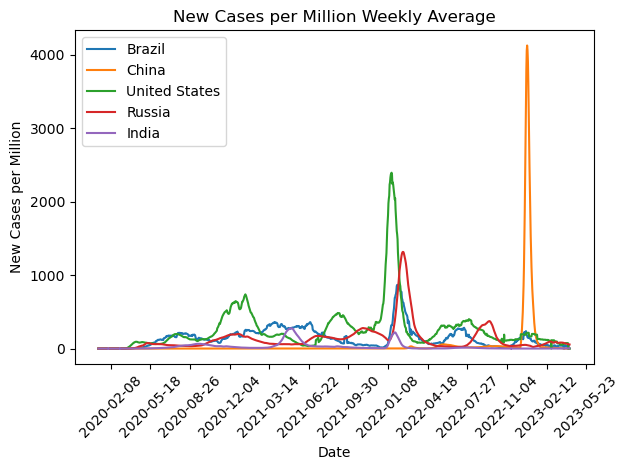

In [31]:
#Plot

for country in countries_of_interest:
    country_data = filtered_df[filtered_df['location_x'] == country]
    plt.plot(country_data.index, country_data[column_to_plot], label=country)

# Set plot title and labels
plt.title('New Cases per Million Weekly Average')
plt.xlabel('Date')
plt.ylabel('New Cases per Million')

# Customize the x-axis tick labels to show every week
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))  # Max 20 tick labels on the x-axis

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=45)

# Add a legend to distinguish the lines
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

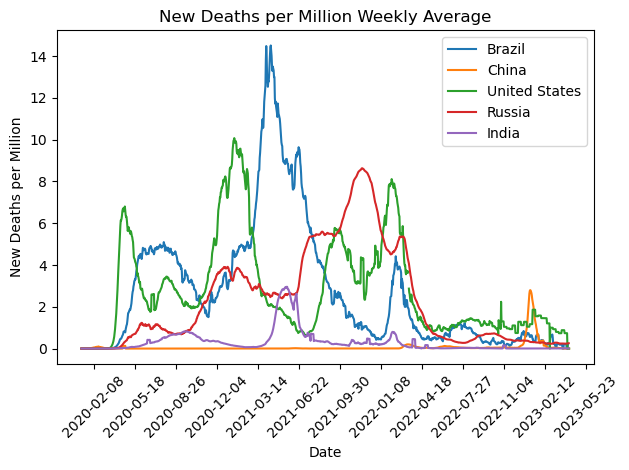

In [32]:
#Now do the same given these countries but focusing on the New Deaths Smoothed Column

column_to_plot_a = 'new_deaths_smoothed_per_million'

for country in countries_of_interest:
    country_data = filtered_df[filtered_df['location_x'] == country]
    plt.plot(country_data.index, country_data[column_to_plot_a], label=country)

# Set plot title and labels
plt.title('New Deaths per Million Weekly Average')
plt.xlabel('Date')
plt.ylabel('New Deaths per Million')

# Customize the x-axis tick labels to show every week
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))  # Max 20 tick labels on the x-axis

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=45)

# Add a legend to distinguish the lines
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

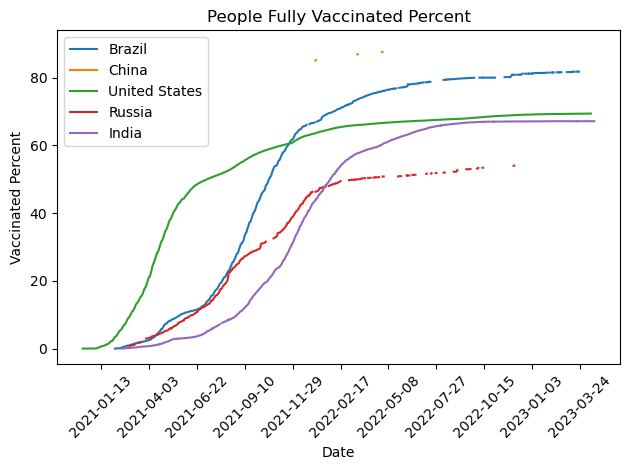

In [33]:
#Now chart vaccination percentage

column_to_plot_b = 'people_fully_vaccinated_per_hundred'

for country in countries_of_interest:
    country_data = filtered_df[filtered_df['location_x'] == country]
    plt.plot(country_data.index, country_data[column_to_plot_b], label=country)

# Set plot title and labels
plt.title('People Fully Vaccinated Percent')
plt.xlabel('Date')
plt.ylabel('Vaccinated Percent')

# Customize the x-axis tick labels to show every week
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))  # Max 20 tick labels on the x-axis

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=45)

# Add a legend to distinguish the lines
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [37]:
# Now looking at other methods of exploration.  This line of code just checks that there are only ever single scores given to the following variables:

# Get unique values for each specified column
unique_population_density = filtered_df['population_density'].unique()
unique_aged_65_older = filtered_df['aged_65_older'].unique()
unique_aged_70_older = filtered_df['aged_70_older'].unique()
unique_gdp_per_capita = filtered_df['gdp_per_capita'].unique()
unique_extreme_poverty = filtered_df['extreme_poverty'].unique()
unique_cardiovasc_death_rate = filtered_df['cardiovasc_death_rate'].unique()
unique_diabetes_prevalence = filtered_df['diabetes_prevalence'].unique()
unique_female_smokers = filtered_df['female_smokers'].unique()
unique_male_smokers = filtered_df['male_smokers'].unique()
unique_hospital_beds_per_thousand = filtered_df['hospital_beds_per_thousand'].unique()
unique_life_expectancy = filtered_df['life_expectancy'].unique()
unique_human_development_index = filtered_df['human_development_index'].unique()

# Print the unique values for each column
print("Unique Values for population_density:", unique_population_density)
print("Unique Values for aged_65_older:", unique_aged_65_older)
print("Unique Values for aged_70_older:", unique_aged_70_older)
print("Unique Values for gdp_per_capita:", unique_gdp_per_capita)
print("Unique Values for extreme_poverty:", unique_extreme_poverty)
print("Unique Values for cardiovasc_death_rate:", unique_cardiovasc_death_rate)
print("Unique Values for diabetes_prevalence:", unique_diabetes_prevalence)
print("Unique Values for female_smokers:", unique_female_smokers)
print("Unique Values for male_smokers:", unique_male_smokers)
print("Unique Values for hospital_beds_per_thousand:", unique_hospital_beds_per_thousand)
print("Unique Values for life_expectancy:", unique_life_expectancy)
print("Unique Values for human_development_index:", unique_human_development_index)


Unique Values for population_density: [ 25.04 147.67 450.42   8.82  35.61]
Unique Values for aged_65_older: [ 8.55 10.64  5.99 14.18 15.41]
Unique Values for aged_70_older: [5.06 5.93 3.41 9.39 9.73]
Unique Values for gdp_per_capita: [14103.45 15308.71  6426.67 24765.95 54225.45]
Unique Values for extreme_poverty: [ 3.4  0.7 21.2  0.1  1.2]
Unique Values for cardiovasc_death_rate: [177.96 261.9  282.28 431.3  151.09]
Unique Values for diabetes_prevalence: [ 8.11  9.74 10.39  6.18 10.79]
Unique Values for female_smokers: [10.1  1.9 23.4 19.1]
Unique Values for male_smokers: [17.9 48.4 20.6 58.3 24.6]
Unique Values for hospital_beds_per_thousand: [2.2  4.34 0.53 8.05 2.77]
Unique Values for life_expectancy: [75.88 76.91 69.66 72.58 78.86]
Unique Values for human_development_index: [0.77 0.76 0.65 0.82 0.93]


### Note to self.  There are probably useful metrics to consider if I build a scatterplot which measures the total death in a country (as chosen by the final date) and charted according to population density/aged_65_older... etc.  These scatter plots might be best for statistical testing.  The maximum date listed for all countries is 4/12/2023.  So I should pull a new dataframe with the country listed as the index, and the numbers chosen from this date.